In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
FILE_PATH = "dataset_crawler-google-places_2025-11-10_23-00-44-771.json"

In [2]:
# 1) Carrega o JSON com os dados.
if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(f"Arquivo não encontrado: {FILE_PATH}")

df = pd.read_json(FILE_PATH, orient="records")

# 2) Mostra shape (linhas x colunas), dtypes e primeiras linhas (head).
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nHead:\n", df.head())

Shape: (15, 42)

Dtypes:
 title                 object
price                float64
categoryName          object
address               object
neighborhood          object
street                object
city                  object
postalCode            object
state                 object
countryCode           object
website               object
phone                 object
phoneUnformatted       int64
claimThisBusiness       bool
location              object
totalScore           float64
permanentlyClosed       bool
temporarilyClosed       bool
placeId               object
categories            object
fid                   object
cid                  float64
reviewsCount           int64
imagesCount          float64
imageCategories       object
scrapedAt             object
googleFoodUrl        float64
hotelAds              object
openingHours          object
peopleAlsoSearch      object
placesTags            object
reviewsTags           object
additionalInfo        object
gasPrices        

In [3]:
# 3) Calcula estatísticas descritivas (.describe()) nas colunas numéricas.
print("\nEstatísticas Descritivas (Numéricas):")
print(df.describe())


Estatísticas Descritivas (Numéricas):
       price  phoneUnformatted  totalScore           cid  reviewsCount  \
count    0.0      1.500000e+01   15.000000  1.500000e+01     15.000000   
mean     NaN      3.226503e+12    4.626667  8.590295e+18    270.266667   
std      NaN      2.585478e+12    0.468229  6.055022e+18    459.940131   
min      NaN      5.562309e+11    3.400000  6.789737e+17      2.000000   
25%      NaN      5.562327e+11    4.550000  2.538761e+18     32.000000   
50%      NaN      5.562982e+12    4.800000  8.666161e+18    102.000000   
75%      NaN      5.562986e+12    5.000000  1.322989e+19    231.000000   
max      NaN      5.562999e+12    5.000000  1.736551e+19   1703.000000   

       imagesCount  googleFoodUrl       rank  
count    14.000000            0.0  15.000000  
mean     40.642857            NaN   8.733333  
std      59.492219            NaN   6.181385  
min       1.000000            NaN   1.000000  
25%      10.750000            NaN   4.000000  
50%      16.

In [4]:
# 4) Faz contagem de valores (.value_counts()) em colunas categóricas (ex.: categoryName, city).
if "categoryName" in df.columns:
    print("\nContagem categoryName:")
    print(df["categoryName"].value_counts())

if "city" in df.columns:
    print("\nContagem city:")
    print(df["city"].value_counts())


Contagem categoryName:
categoryName
Imobiliária                        14
Corretora de aluguel de imóveis     1
Name: count, dtype: int64

Contagem city:
city
Goiânia    15
Name: count, dtype: int64


In [5]:
# 5) Detecta outliers com o método IQR (Interquartile Range) em colunas numéricas (ex.: reviewsCount, totalScore).
def detect_outliers_iqr(df, column):
    if column not in df.columns: return pd.DataFrame()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in ["reviewsCount", "totalScore"]:
    outliers = detect_outliers_iqr(df, col)
    print(f"\nOutliers em {col}: {len(outliers)}")


Outliers em reviewsCount: 2

Outliers em totalScore: 1


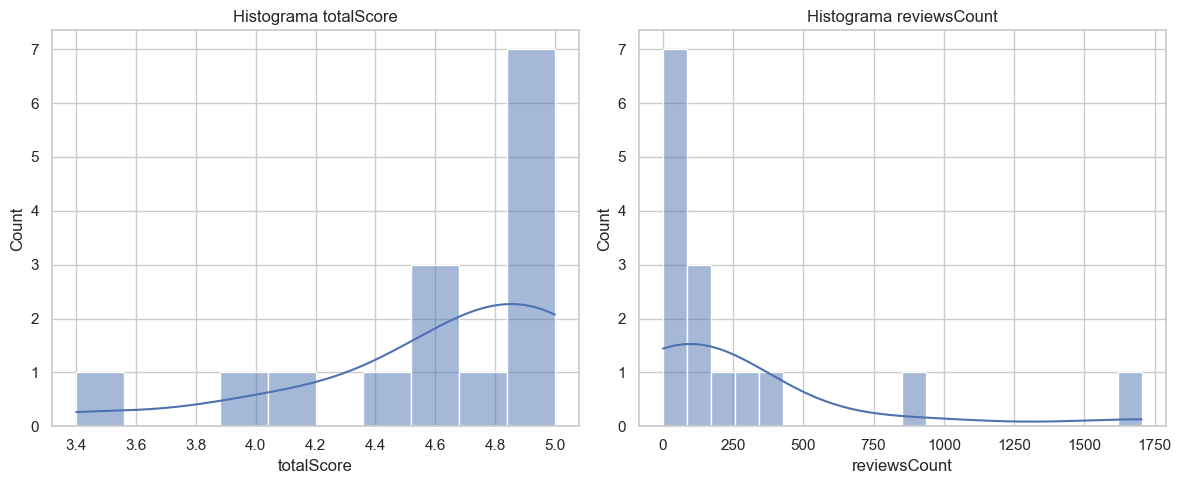

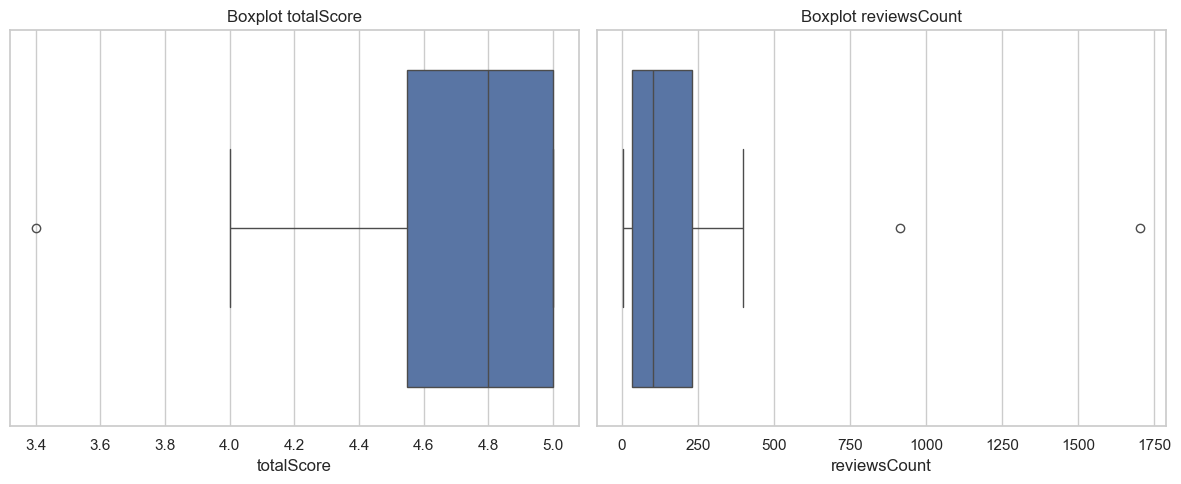

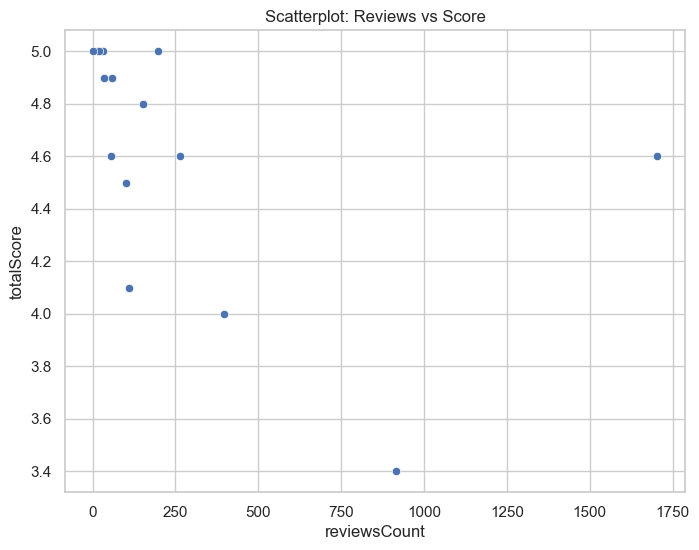

In [6]:
# 6) Gera visualizações com SEABORN e também com MATPLOTLIB (histogramas, boxplots e scatterplots).

# Histogramas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
if "totalScore" in df.columns:
    sns.histplot(df["totalScore"], kde=True, bins=10)
    plt.title("Histograma totalScore")

plt.subplot(1, 2, 2)
if "reviewsCount" in df.columns:
    sns.histplot(df["reviewsCount"], kde=True, bins=20)
    plt.title("Histograma reviewsCount")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
if "totalScore" in df.columns:
    sns.boxplot(x=df["totalScore"])
    plt.title("Boxplot totalScore")

plt.subplot(1, 2, 2)
if "reviewsCount" in df.columns:
    sns.boxplot(x=df["reviewsCount"])
    plt.title("Boxplot reviewsCount")
plt.tight_layout()
plt.show()

# Scatterplot
plt.figure(figsize=(8, 6))
if "reviewsCount" in df.columns and "totalScore" in df.columns:
    sns.scatterplot(data=df, x="reviewsCount", y="totalScore")
    plt.title("Scatterplot: Reviews vs Score")
plt.show()